In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
base_dir = '/content/drive/My Drive/dataset-pcd/'
!ls "/content/drive/My Drive/dataset-pcd/"

 bahan					 proses					  Untitled0.ipynb
'(fixx) klasifikasi-uang-rupiah.ipynb'	'(rev-3) klasifikasi-uang-rupiah.ipynb'   validasi
 klasifikasi-uang-rupiah.ipynb		'(rev)klasifikasi-uang-rupiah.ipynb'
 latih					'Salinan klasifikasi-uang-rupiah.ipynb'


In [3]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import matplotlib.pyplot as plt
from shutil import copyfile

In [4]:
# Tentukan direktori bahan, train, dan validation
bahan_dir = os.path.join(base_dir, 'bahan')
train_dir = os.path.join(base_dir, 'latih')
validation_dir = os.path.join(base_dir, 'validasi')
processed_dir = os.path.join(base_dir, 'proses')

In [5]:
# menentukan direktori isi bahan
seratus_dir = os.path.join(bahan_dir, 'seratus/')
limapuluh_dir = os.path.join(bahan_dir, 'limapuluh/')



In [6]:
print("jumlah Data Train Tiap Kelas")
print('Jumlah gambar uang 100.000  :', len(os.listdir(seratus_dir)))
print('Jumlah gambar uang 50.000  :', len(os.listdir(limapuluh_dir)))

jumlah Data Train Tiap Kelas
Jumlah gambar uang 100.000  : 11
Jumlah gambar uang 50.000  : 12


In [7]:
# Direktori isi latih/training
train_seratus = os.path.join(train_dir, 'seratus/')
train_limapuluh = os.path.join(train_dir, 'limapuluh/')

# Direktori isi validasi
validation_seratus = os.path.join(validation_dir, 'seratus/')
validation_limapuluh = os.path.join(validation_dir, 'limapuluh/')

In [8]:
import os
import random # Import the random module
from shutil import copyfile

def train_val_split(source, train, val, train_ratio):
    total_size = len(os.listdir(source))
    train_size = int(train_ratio * total_size)
    val_size = total_size - train_size

    randomized = random.sample(os.listdir(source), total_size)
    train_files = randomized[0:train_size]
    val_files = randomized[train_size:total_size]

    for i in train_files:
        i_file = source + i
        destination = train + i
        copyfile(i_file, destination)

    for i in val_files:
        i_file = source + i
        destination = val + i
        copyfile(i_file, destination)

#jumlah pembagian data training dan testing
train_ratio = 0.9

#pembagian training dan validasi
# training
source_00 = seratus_dir
train_00 = train_seratus
val_00 = validation_seratus
train_val_split(source_00, train_00, val_00, train_ratio)

# validasi
source_01 = limapuluh_dir
train_01 = train_limapuluh
val_01 = validation_limapuluh
train_val_split(source_01, train_01, val_01, train_ratio)

In [9]:
print("Jumlah file di seratus_dir:", len(os.listdir(seratus_dir)))
print("Jumlah file di train_seratus:", len(os.listdir(train_seratus)))
print("Jumlah file di validation_seratus:", len(os.listdir(validation_seratus)))

Jumlah file di seratus_dir: 11
Jumlah file di train_seratus: 11
Jumlah file di validation_seratus: 4


In [10]:
def equalize_histogram(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])
    image_equalized = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)
    return image_equalized

def process_and_save_images(source_dir, dest_dir):
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    for subdir in os.listdir(source_dir):
        subdir_path = os.path.join(source_dir, subdir)
        dest_subdir_path = os.path.join(dest_dir, subdir)

        if not os.path.exists(dest_subdir_path):
            os.makedirs(dest_subdir_path)

        for image_name in os.listdir(subdir_path):
            image_path = os.path.join(subdir_path, image_name)
            processed_image = equalize_histogram(image_path)
            dest_image_path = os.path.join(dest_subdir_path, image_name)
            cv2.imwrite(dest_image_path, processed_image)

process_and_save_images(train_dir, os.path.join(processed_dir, 'latih'))
process_and_save_images(validation_dir, os.path.join(processed_dir, 'validasi'))

In [11]:
# Visualisasi gambar yang mengalami kelebihan brightness atau contrast sebelum dan sesudah ekualisasi histogram
def visualize_histogram_equalization(original_image_path, equalized_image_path):
    original_image = cv2.imread(original_image_path)
    equalized_image = cv2.imread(equalized_image_path)

    original_image_gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    equalized_image_gray = cv2.cvtColor(equalized_image, cv2.COLOR_BGR2GRAY)

    plt.figure(figsize=(15, 8))

    # Plot original image and histogram
    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.hist(original_image_gray.ravel(), 256, [0, 256])
    plt.title('Original Histogram')

    # Plot equalized image and histogram
    plt.subplot(2, 3, 2)
    plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
    plt.title('Equalized Image')
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.hist(equalized_image_gray.ravel(), 256, [0, 256])
    plt.title('Equalized Histogram')

    # Plot equalized image in grayscale
    plt.subplot(2, 3, 3)
    plt.imshow(equalized_image_gray, cmap='gray')
    plt.title('Equalized Image in Grayscale')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

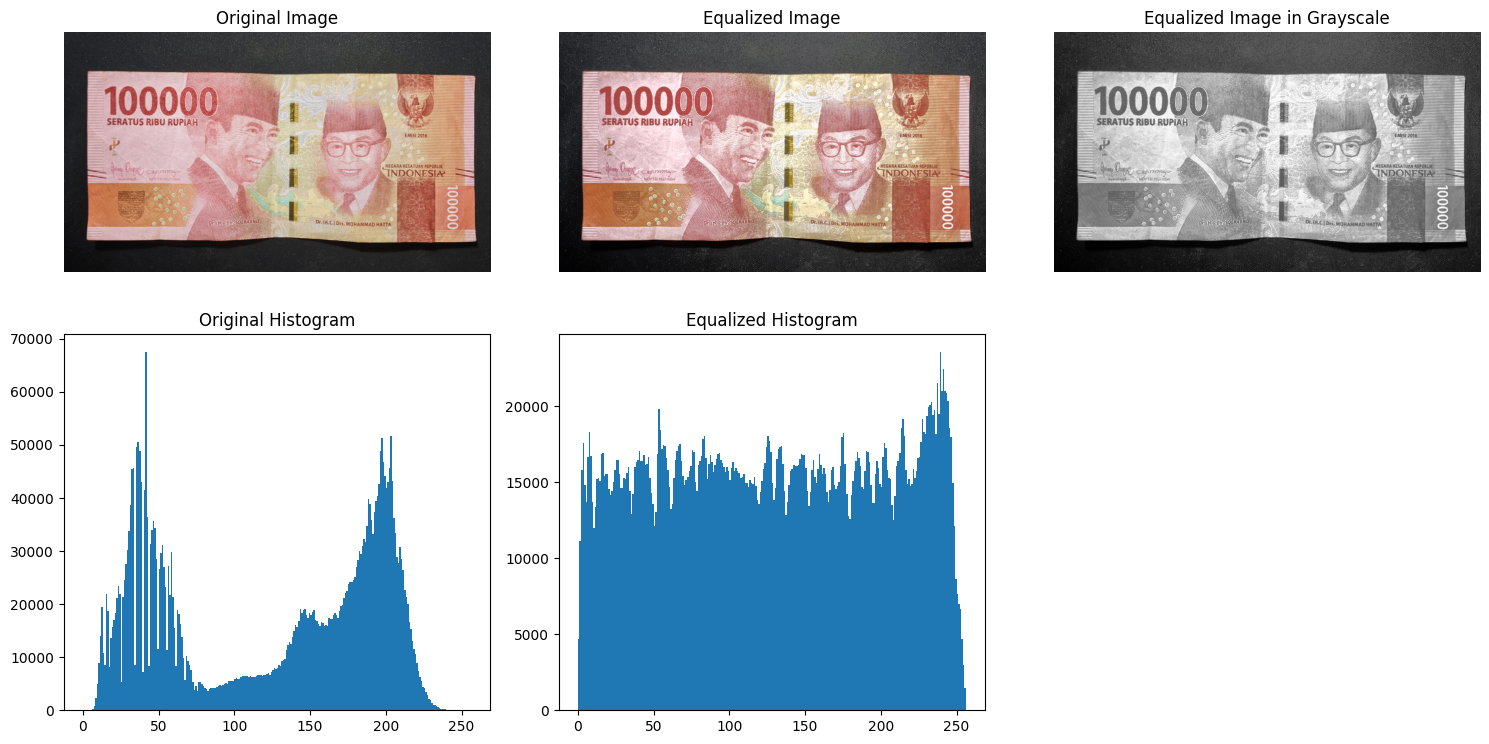

In [12]:
# Visualisasi
example_image_path = os.path.join(train_seratus, os.listdir(train_seratus)[0])
example_equalized_image_path = os.path.join(processed_dir, 'latih/seratus', os.listdir(train_seratus)[0])
visualize_histogram_equalization(example_image_path, example_equalized_image_path)

In [13]:
# ImageDataGenerator untuk pelatihan
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.1
)

# ImageDataGenerator untuk validasi
val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.1
)

In [14]:
# Data Generator
train_generator = train_datagen.flow_from_directory(
    os.path.join(processed_dir, 'latih'),
    target_size=(150, 150),
    batch_size=10,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(processed_dir, 'validasi'),
    target_size=(150, 150),
    batch_size=10,
    class_mode='categorical'
)

Found 23 images belonging to 2 classes.
Found 27 images belonging to 2 classes.


In [15]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') > 0.99:
            print('\Akurasi mencapai 99%')
            self.model.stop_training = True

callbacks = [
    myCallback(),
    tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min'),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]


In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.3, seed=112),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dropout(0.5, seed=112),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [18]:
model.compile(loss = 'categorical_crossentropy' ,
              optimizer = 'Adam' ,
              metrics = ['accuracy'])

In [19]:
steps_per_epoch = len(train_generator)
validation_steps = len(val_generator)

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=25,
    validation_data=val_generator,
    validation_steps=validation_steps,
    verbose=1,
    callbacks=callbacks
)

# Check if validation data was generated
print("Any validation data generated?:", any(val_generator))
if not any(val_generator):
    print("WARNING: Your validation generator did not yield any data. Check your validation data generator.")

# Check if training was stopped early
print("Training stopped early:", model.stop_training)


Epoch 1/25
3/3 [==============================] - ETA: 0s - loss: 0.8300 - accuracy: 0.6522

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 16s 7s/step - loss: 0.8300 - accuracy: 0.6522 - val_loss: 0.9277 - val_accuracy: 0.5556
Epoch 2/25
3/3 [==============================] - 2s 734ms/step - loss: 1.0171 - accuracy: 0.3478 - val_loss: 0.6742 - val_accuracy: 0.5556
Epoch 3/25
3/3 [==============================] - 3s 1s/step - loss: 0.7339 - accuracy: 0.3043 - val_loss: 0.6932 - val_accuracy: 0.4444
Epoch 4/25
3/3 [==============================] - 2s 619ms/step - loss: 0.6880 - accuracy: 0.5652 - val_loss: 0.6990 - val_accuracy: 0.4444
Epoch 5/25
3/3 [==============================] - 2s 669ms/step - loss: 0.7000 - accuracy: 0.4783 - val_loss: 0.6829 - val_accuracy: 0.4444
Epoch 6/25
3/3 [==============================] - 2s 677ms/step - loss: 0.6667 - accuracy: 0.6522 - val_loss: 0.6660 - val_accuracy: 0.6667
Epoch 7/25
3/3 [==============================] - 2s 712ms/step - loss: 0.6750 - accuracy: 0.6522 - val_loss: 0.6199 - val_accuracy: 1.0000
Epoch 8/25
3/3 [====================

In [20]:
print("loss:", history.history['loss'])
print("accuracy:", history.history['accuracy'])
print("val_accuracy:", history.history['val_accuracy'])

loss: [0.8300386667251587, 1.0170713663101196, 0.7339059710502625, 0.6879504919052124, 0.6999969482421875, 0.6667279601097107, 0.6749922633171082, 0.7123092412948608, 0.6245436668395996, 0.6047766804695129, 0.502734363079071, 0.4504769742488861, 0.2935168147087097, 0.24080100655555725, 0.22002770006656647, 0.33811333775520325, 0.4928443729877472, 0.8365486264228821, 0.1475461721420288, 0.35323309898376465, 0.0950007364153862]
accuracy: [0.6521739363670349, 0.3478260934352875, 0.30434781312942505, 0.5652173757553101, 0.47826087474823, 0.6521739363670349, 0.6521739363670349, 0.47826087474823, 0.6521739363670349, 0.739130437374115, 0.8695651888847351, 0.8260869383811951, 0.95652174949646, 0.8695651888847351, 0.9130434989929199, 0.8260869383811951, 0.782608687877655, 0.8260869383811951, 0.95652174949646, 0.8260869383811951, 1.0]
val_accuracy: [0.5555555820465088, 0.5555555820465088, 0.4444444477558136, 0.4444444477558136, 0.4444444477558136, 0.6666666865348816, 1.0, 0.48148149251937866, 0.

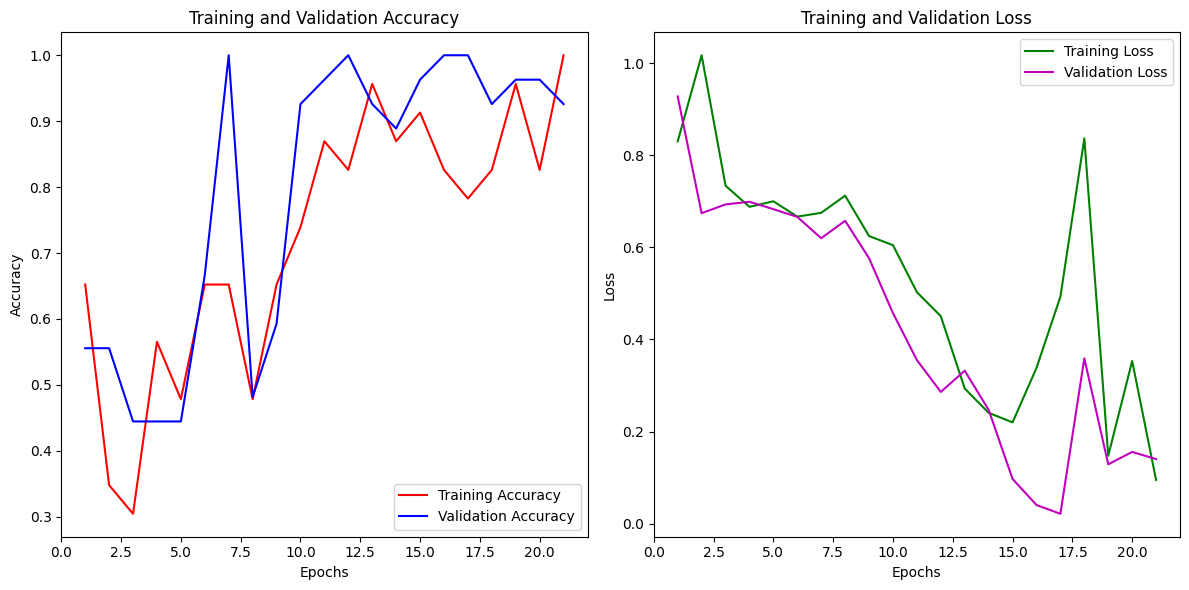

In [21]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'm', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Saving WhatsApp Image 2024-06-25 at 15.18.22.jpeg to WhatsApp Image 2024-06-25 at 15.18.22.jpeg
1/1 [==============================] - 0s 55ms/step
WhatsApp Image 2024-06-25 at 15.18.22.jpeg
Gambar yang ditampilkan adalah seratus ribu rupiah


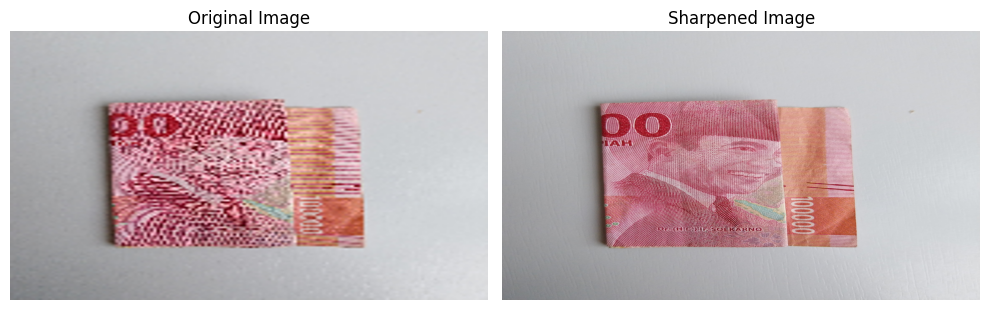

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from google.colab import files
import os
from PIL import Image, ImageEnhance, ImageFilter

# Upload gambar dari local ke Google Colab
uploaded = files.upload()

# Loop untuk setiap file yang diupload
for fn in uploaded.keys():
    # Memuat gambar dan menampilkannya
    path = fn
    img = image.load_img(path, target_size=(150, 150))

    # Memuat gambar untuk prediksi asli
    plt.figure(figsize=(10, 5))

    # Subplot untuk gambar asli
    plt.subplot(1, 2, 1)
    plt.imshow(img.resize((1280, 720)))
    plt.axis('off')
    plt.title('Original Image')

    # Memproses gambar untuk prediksi
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=100)

    print(fn)

    # Mencetak hasil prediksi
    class_list = os.listdir(train_dir)
    for j in range(len(class_list)):
        if classes[0][j] > 0.8:  # Menggunakan threshold 0.5 untuk menentukan kelas
            print('Gambar yang ditampilkan adalah', class_list[j], 'ribu rupiah')
            break

    # Melakukan sharpen pada gambar
    img = Image.open(path)
    img_sharpened = img.filter(ImageFilter.SHARPEN)
    img_sharpened = img_sharpened.resize((1280, 720))  # Resize untuk ditampilkan dengan matplotlib

    # Subplot untuk gambar yang telah di-sharpen
    plt.subplot(1, 2, 2)
    plt.imshow(img_sharpened)
    plt.axis('off')
    plt.title('Sharpened Image')

    plt.tight_layout()
    plt.show()

    # Melakukan proses untuk prediksi setelah sharpen
    x_sharpened = image.img_to_array(img_sharpened)
    x_sharpened = np.expand_dims(x_sharpened, axis=0)
    images_sharpened = np.vstack([x_sharpened])